In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [36]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2,
                  random_state=0)
Dataset=pd.read_csv('D:/NITIN/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')
X=Dataset.iloc[:,[3,4]].values

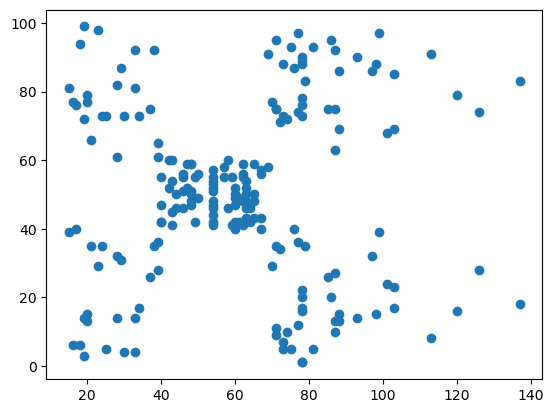

In [37]:
plt.scatter(X[:,0],X[:,1])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [39]:
from sklearn.cluster import KMeans

# Find K Value by Elbow method

In [40]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [41]:
wcss

[182335.29850746266,
 117378.662377451,
 70288.00215686274,
 48126.62247474748,
 31129.164182811724,
 24760.80307170061,
 19000.568542568544,
 14844.02594997595,
 13363.165079365079,
 11968.790764790767]

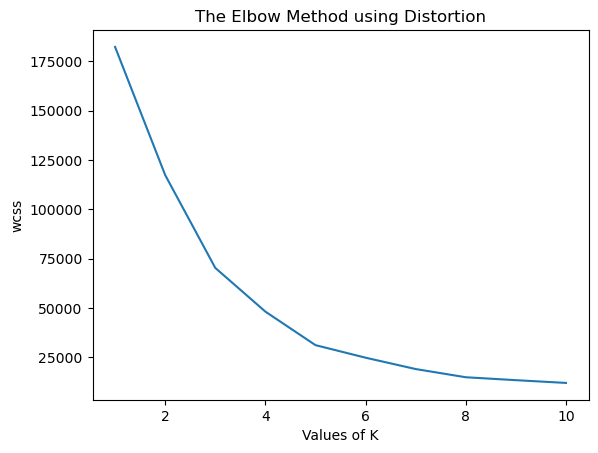

In [42]:
plt.plot(range(1,11), wcss)
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method using Distortion')
plt.show()

# or other method of finding k value using function(knee locator)

In [50]:
!pip install kneed

In [53]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow


4

# find labels

In [43]:
kmeans = KMeans(n_clusters=5, random_state=0, init="k-means++")
y_labels=kmeans.fit_predict(X_train)

C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
y_test_lables=kmeans.predict(X_test)

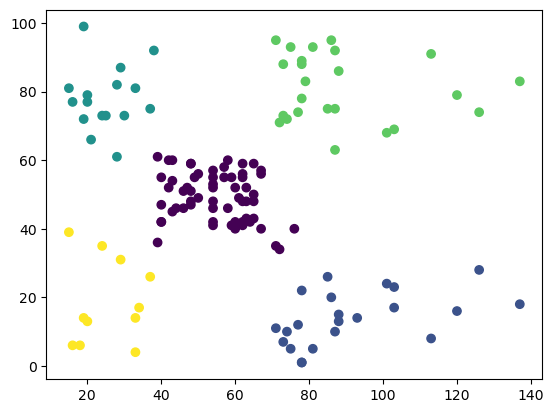

In [49]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

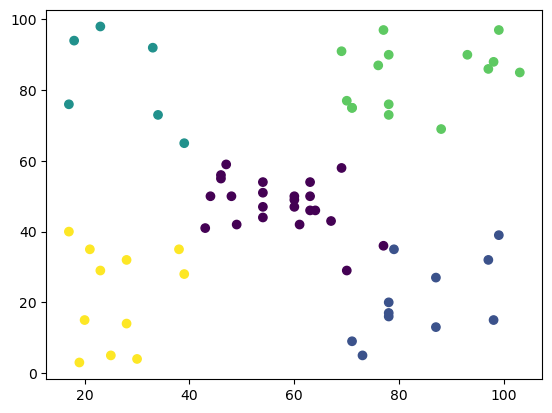

In [47]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lables)

# performace : silhoutte  score

In [55]:
from sklearn.metrics import silhouette_score
silhouette_cofficent=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_cofficent.append(score)

C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [56]:
silhouette_cofficent

[0.4248238965638416,
 0.48138041502971,
 0.507538692583547,
 0.5617704548860487,
 0.5614435970068962,
 0.5617233350961841,
 0.48213096754017226,
 0.46814328409734135,
 0.4613141572818629]

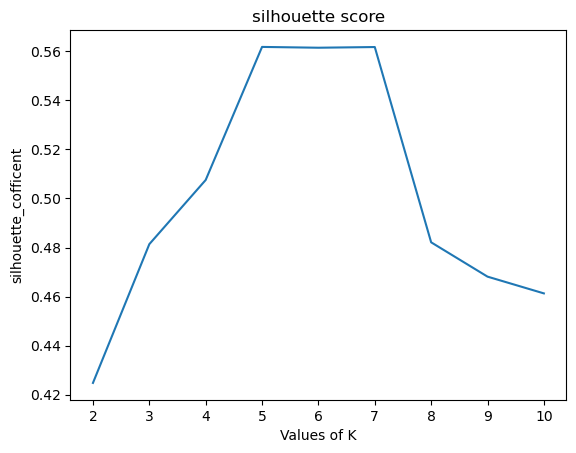

In [58]:
plt.plot(range(2,11),silhouette_cofficent )
plt.xlabel('Values of K')
plt.ylabel('silhouette_cofficent')
plt.title('silhouette score')
plt.show()